# Transform generators

We can generate ants/itk transforms with ANTsPy generator classes.   These can also be chained together.  Parameters are generated from user-set gaussian distributions (mean and standard deviation).  First, we show 2D.

In [1]:
import ants

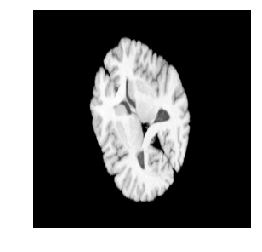

In [5]:
img = ants.image_read(ants.get_ants_data("r16"))
rRotGenerator = ants.contrib.RandomRotate2D( ( 0, 40 ), reference=img )
rShearGenerator=ants.contrib.RandomShear2D( (0,50), reference=img )
tx1 = rRotGenerator.transform()
tx2 = rShearGenerator.transform()
rSrR = ants.compose_ants_transforms([tx1, tx2])
ants.plot( rSrR.apply_to_image( img ) )

We can call the generator(s) again to get a new transforms.

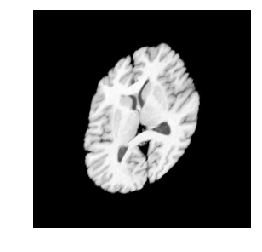

In [6]:
tx1 = rRotGenerator.transform()
tx2 = rShearGenerator.transform()
rSrR = ants.compose_ants_transforms([tx2, tx1]) # switch order
ants.plot( rSrR.apply_to_image( img ) )

The code for 3D is nearly identical.

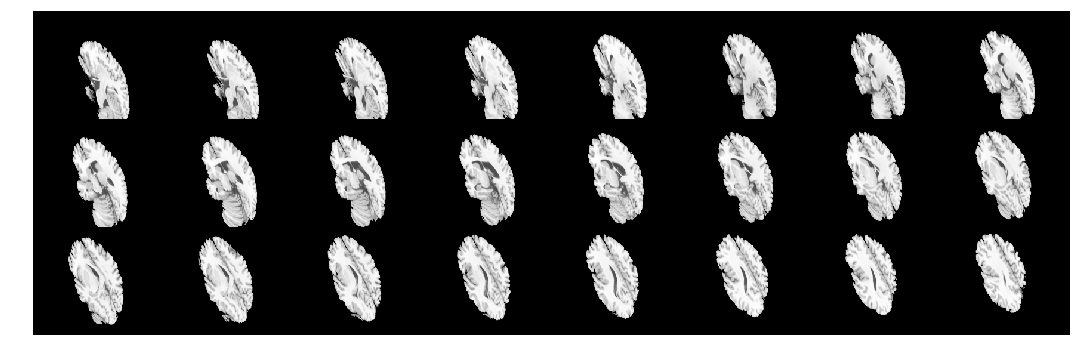

In [7]:
import ants
img = ants.image_read(ants.get_ants_data("ch2"))
rRotGenerator = ants.contrib.RandomRotate3D( ( 0, 40 ), reference=img )
rShearGenerator=ants.contrib.RandomShear3D( (0,50), reference=img )
tx1 = rRotGenerator.transform()
tx2 = rShearGenerator.transform()
rSrR = ants.compose_ants_transforms([tx1, tx2])
ants.plot( rSrR.apply_to_image( img ), nslices = 24, ncol=8 )

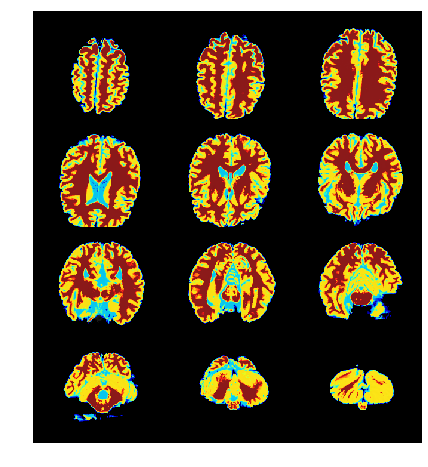

In [10]:
# transform both x and y
seg = ants.threshold_image( img, 'Otsu', 3 )
imgaug = rRotGenerator.transform( img, seg )
ants.plot( imgaug[0], imgaug[1], alpha=0 )